In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

2023-11-27 17:59:59.395816: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
def create_model_with_activation(activation):
    inputs = Input(shape=(28, 28, 1))
    x = Conv2D(32, kernel_size=(3, 3), activation=activation)(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation=activation)(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation=activation)(x)
    x = Dropout(0.5)(x)
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [4]:
# Adjusted visualization function
def display_activation(function_name, activations, col_size, row_size, layer_name):
    num_maps = activations.shape[-1]  # Number of feature maps
    fig, axs = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 1.5))
    for i in range(row_size * col_size):
        if i < num_maps:
            # Only plot if there's a feature map to display
            ax = axs[i // col_size, i % col_size]
            ax.imshow(activations[0, :, :, i], cmap='gray')
            ax.axis('off')
        else:
            # Turn off axis for any extra subplots
            axs[i // col_size, i % col_size].axis('off')
    plt.suptitle(f"{function_name}: Feature maps at layer {layer_name}")
    plt.show()

In [5]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu', 'selu', 'softmax']

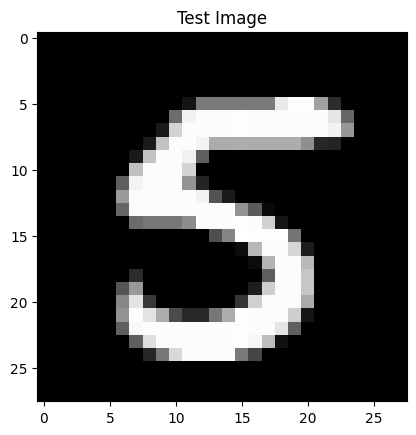

(1, 28, 28, 1, 1)


In [6]:
# Make sure the test image is of the correct shape
# Assuming test_image is a 2D array of shape (28, 28)
test_image = x_test[np.random.choice(x_test.shape[0])]  # Select a random image from the test set
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title("Test Image")
plt.show()

# Ensure test_image is 4D: (1, 28, 28, 1)
test_image_reshaped = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image_reshaped = np.expand_dims(test_image_reshaped, axis=-1)  # Add channel dimension if needed

# Confirm the shape
print(test_image_reshaped.shape)  # This should print (1, 28, 28, 1)

2023-11-27 18:00:03.834039: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:280] failed call to cuInit: UNKNOWN ERROR (34)


Epoch 1/5


2023-11-27 18:00:04.176797: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.7912 - loss: 0.6568 - val_accuracy: 0.9815 - val_loss: 0.0599
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9682 - loss: 0.1047 - val_accuracy: 0.9880 - val_loss: 0.0430
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9749 - loss: 0.0812 - val_accuracy: 0.9892 - val_loss: 0.0365
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9828 - loss: 0.0594 - val_accuracy: 0.9895 - val_loss: 0.0345
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9845 - loss: 0.0478 - val_accuracy: 0.9907 - val_loss: 0.0332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


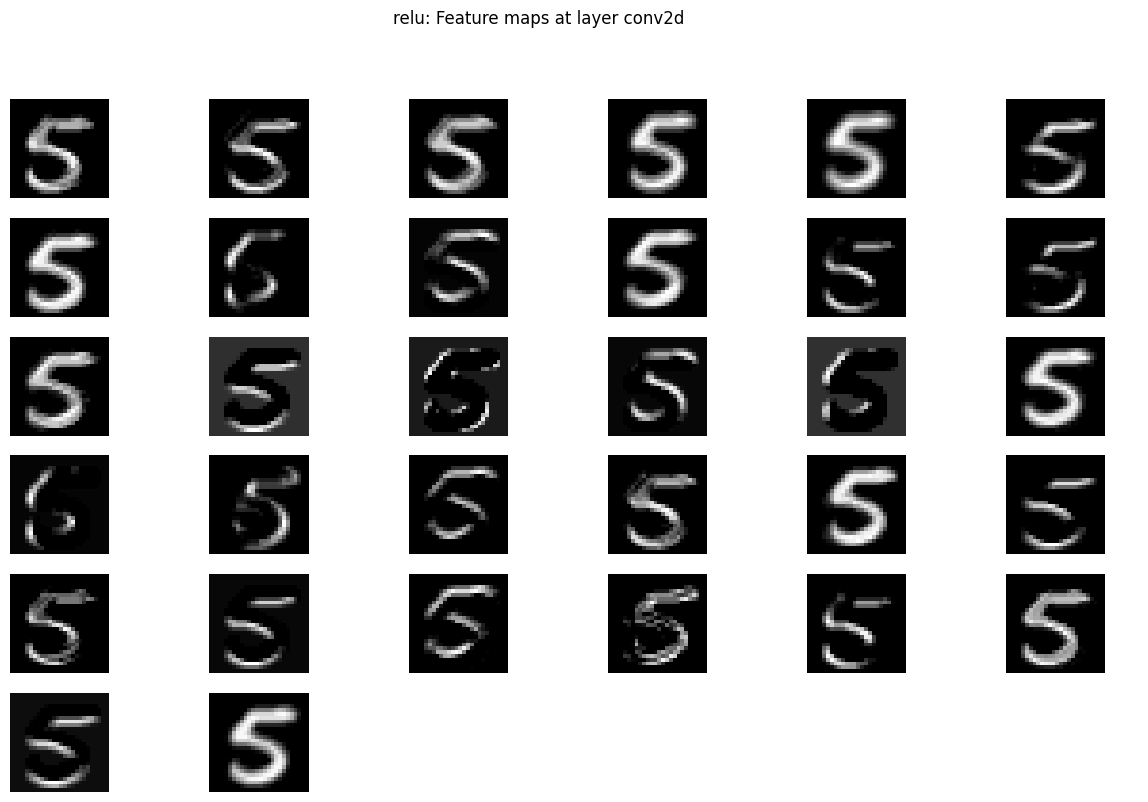

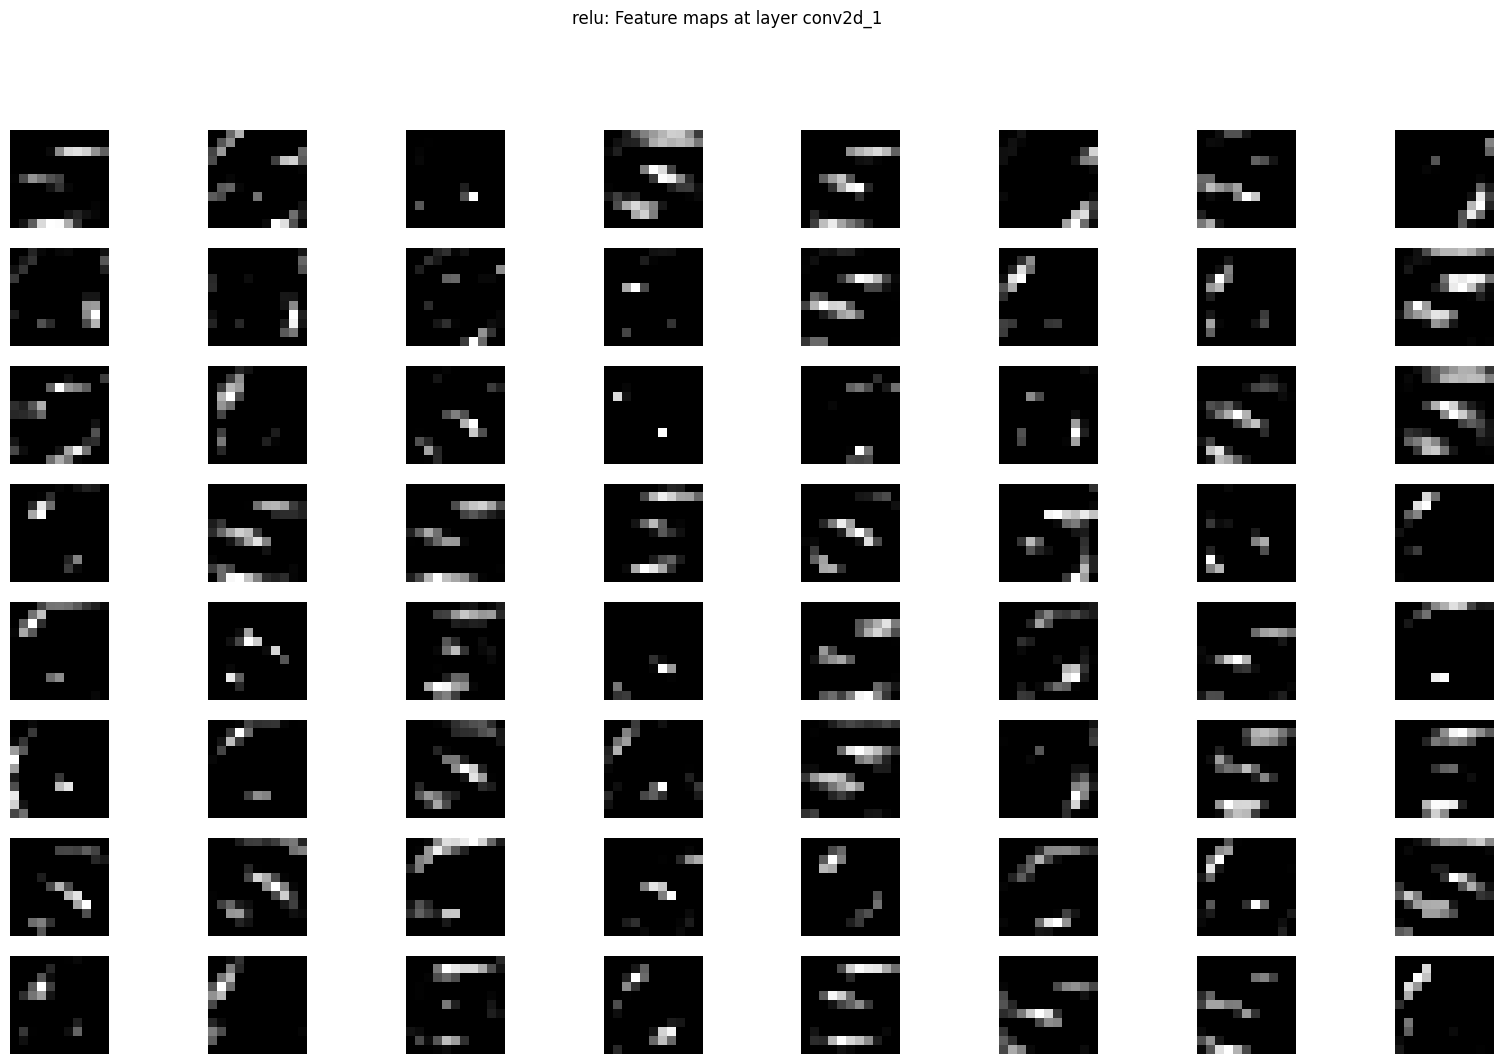

Epoch 1/5


2023-11-27 18:01:29.905189: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.1094 - loss: 2.3279 - val_accuracy: 0.7510 - val_loss: 0.9558
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.8154 - loss: 0.6199 - val_accuracy: 0.9612 - val_loss: 0.1433
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9411 - loss: 0.2054 - val_accuracy: 0.9743 - val_loss: 0.0876
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9580 - loss: 0.1458 - val_accuracy: 0.9813 - val_loss: 0.0696
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9658 - loss: 0.1154 - val_accuracy: 0.9787 - val_loss: 0.0680
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


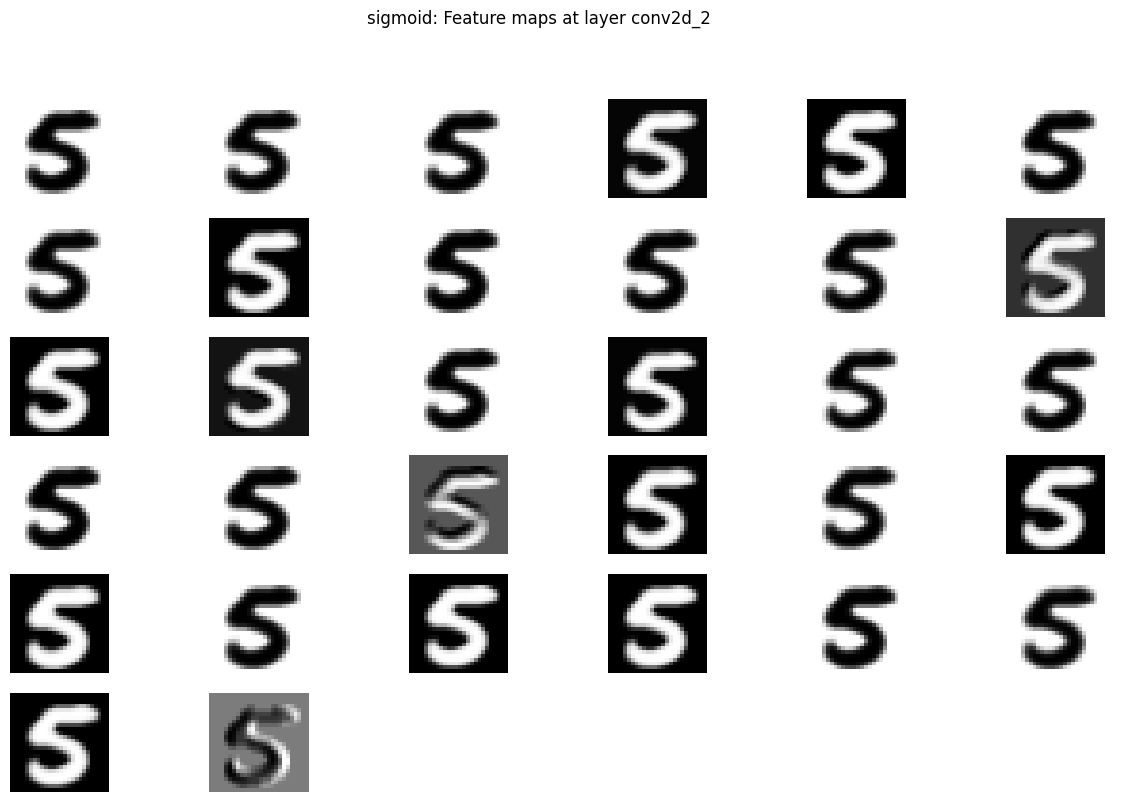

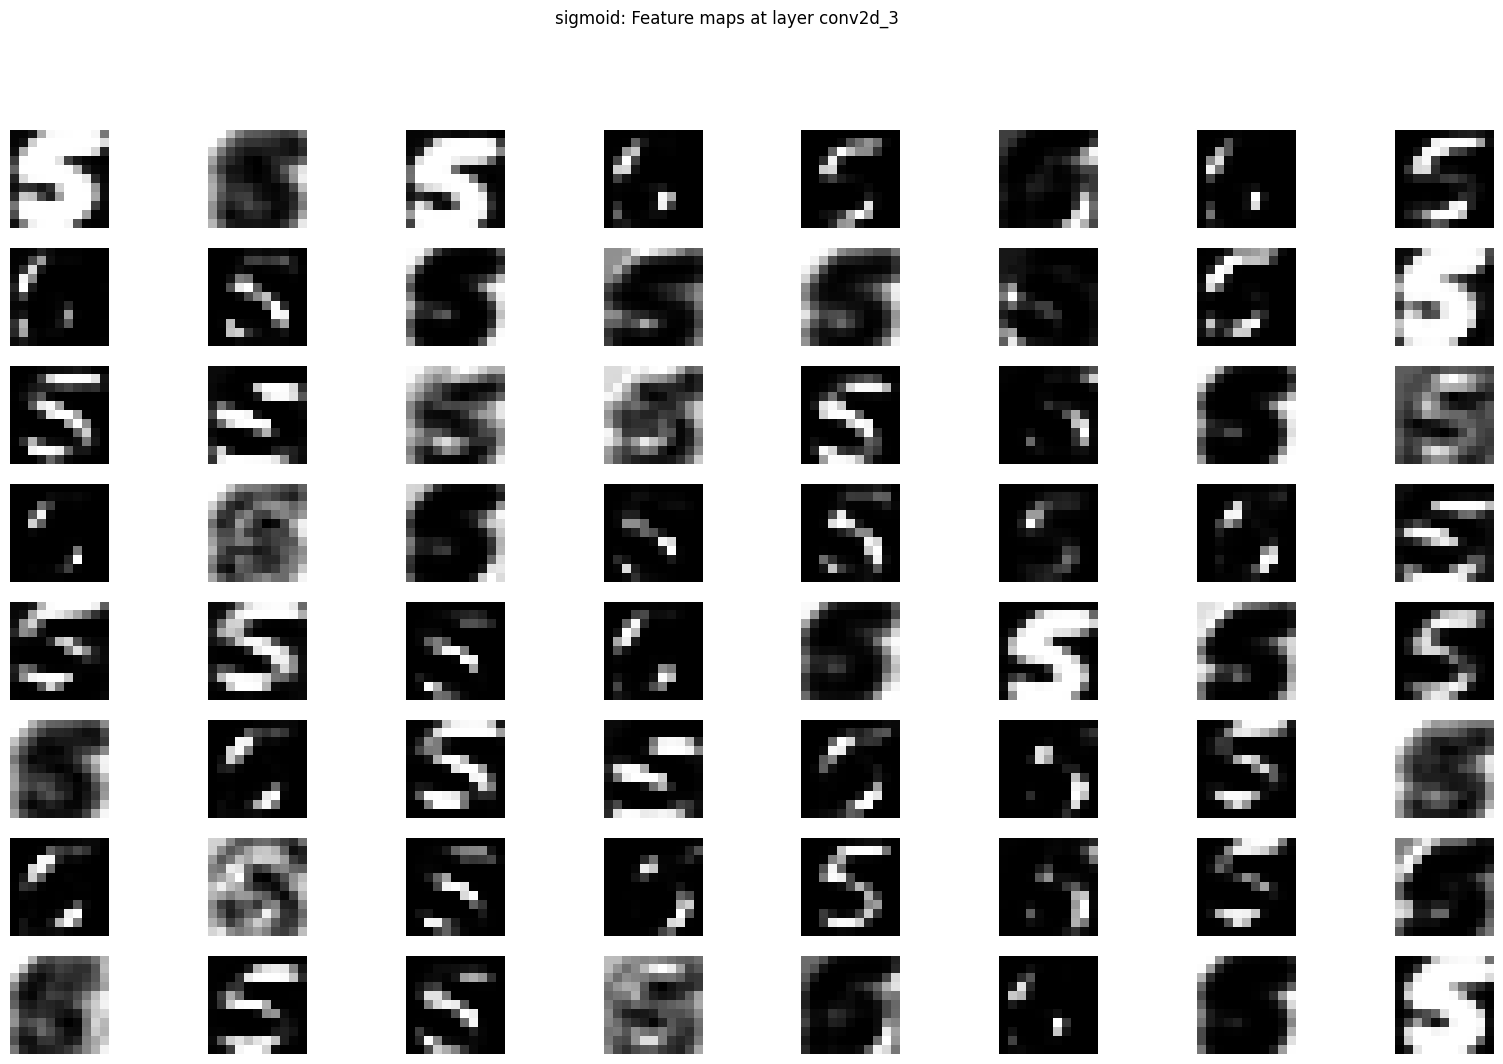

Epoch 1/5


2023-11-27 18:02:57.159053: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.8415 - loss: 0.5207 - val_accuracy: 0.9838 - val_loss: 0.0656
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9739 - loss: 0.0890 - val_accuracy: 0.9863 - val_loss: 0.0512
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9802 - loss: 0.0645 - val_accuracy: 0.9862 - val_loss: 0.0530
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9833 - loss: 0.0537 - val_accuracy: 0.9875 - val_loss: 0.0444
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9849 - loss: 0.0477 - val_accuracy: 0.9893 - val_loss: 0.0417
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


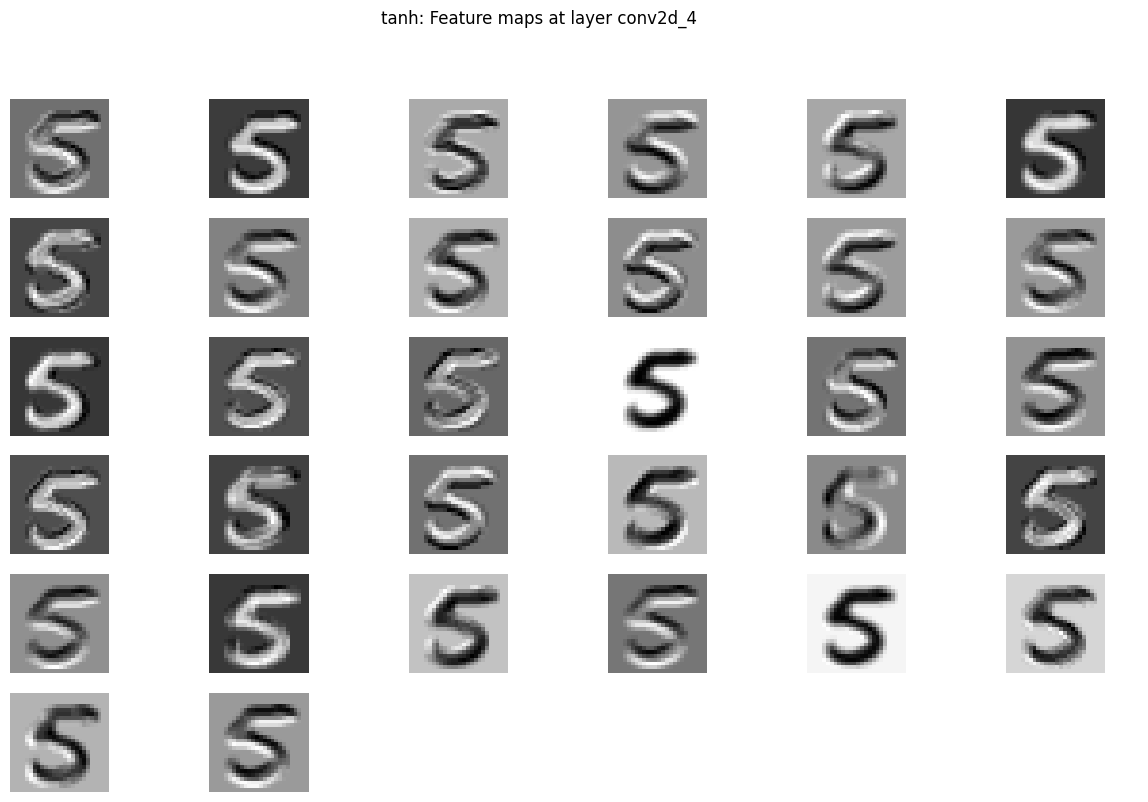

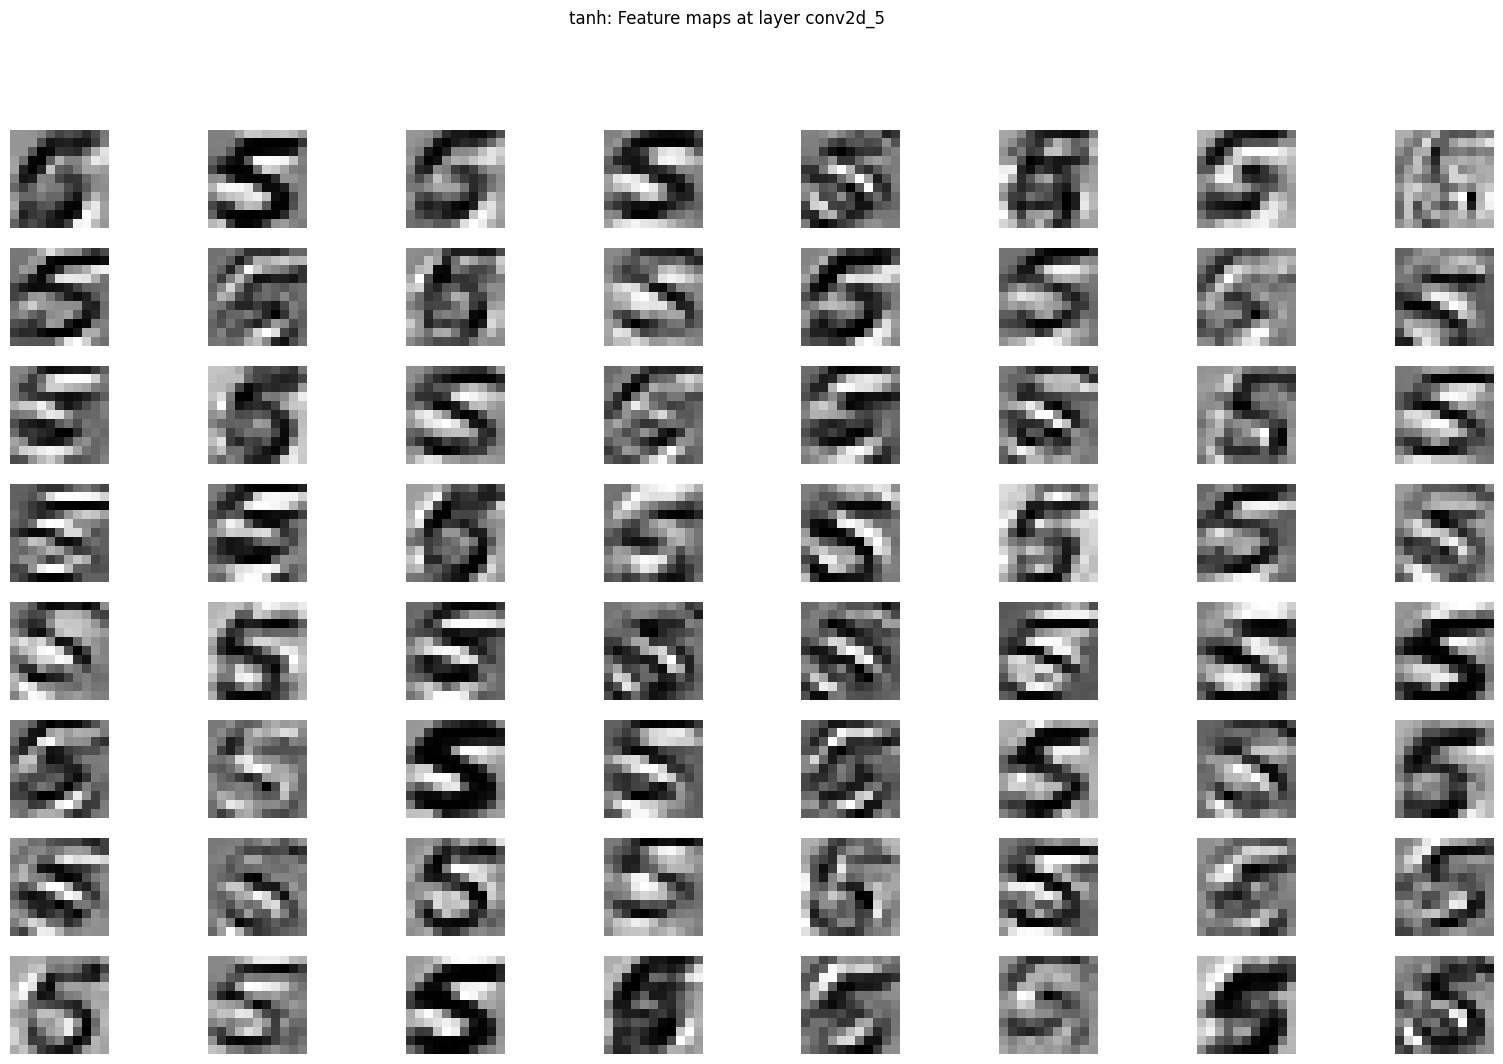

Epoch 1/5


2023-11-27 18:04:28.172809: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8483 - loss: 0.5077 - val_accuracy: 0.9837 - val_loss: 0.0587
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.9735 - loss: 0.0874 - val_accuracy: 0.9867 - val_loss: 0.0504
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9800 - loss: 0.0648 - val_accuracy: 0.9883 - val_loss: 0.0440
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9845 - loss: 0.0503 - val_accuracy: 0.9890 - val_loss: 0.0446
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9849 - loss: 0.0469 - val_accuracy: 0.9880 - val_loss: 0.0443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


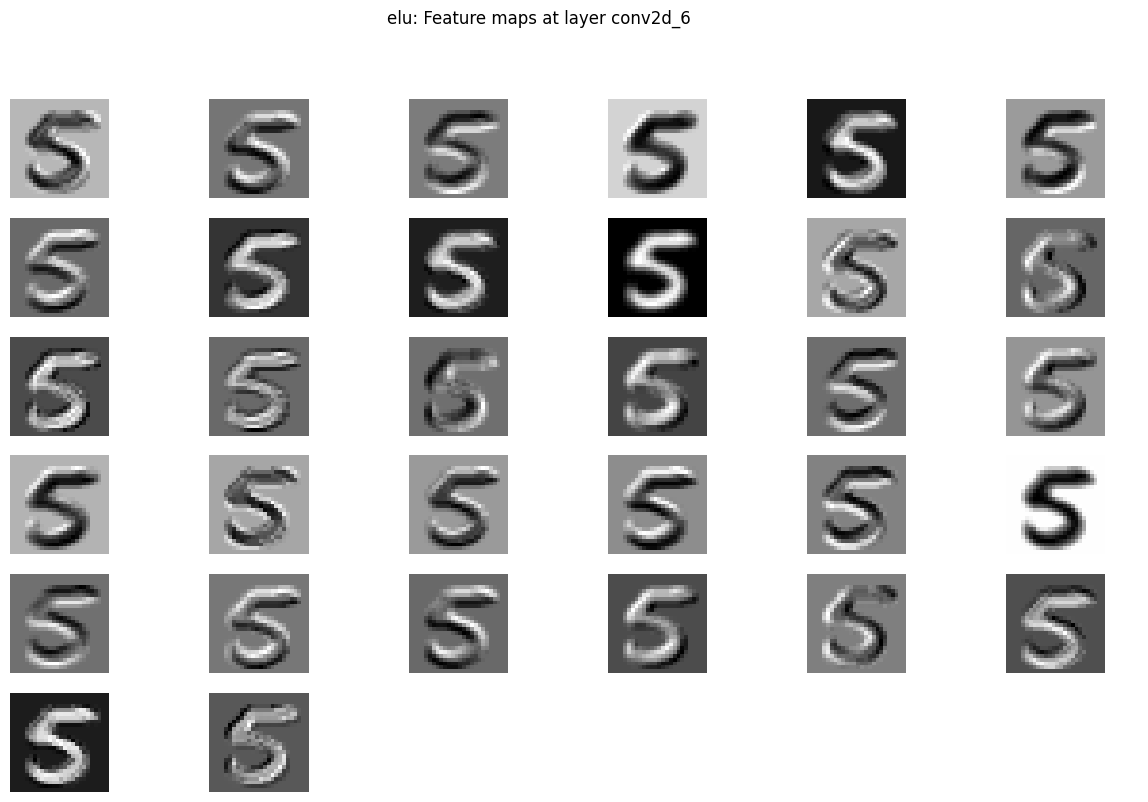

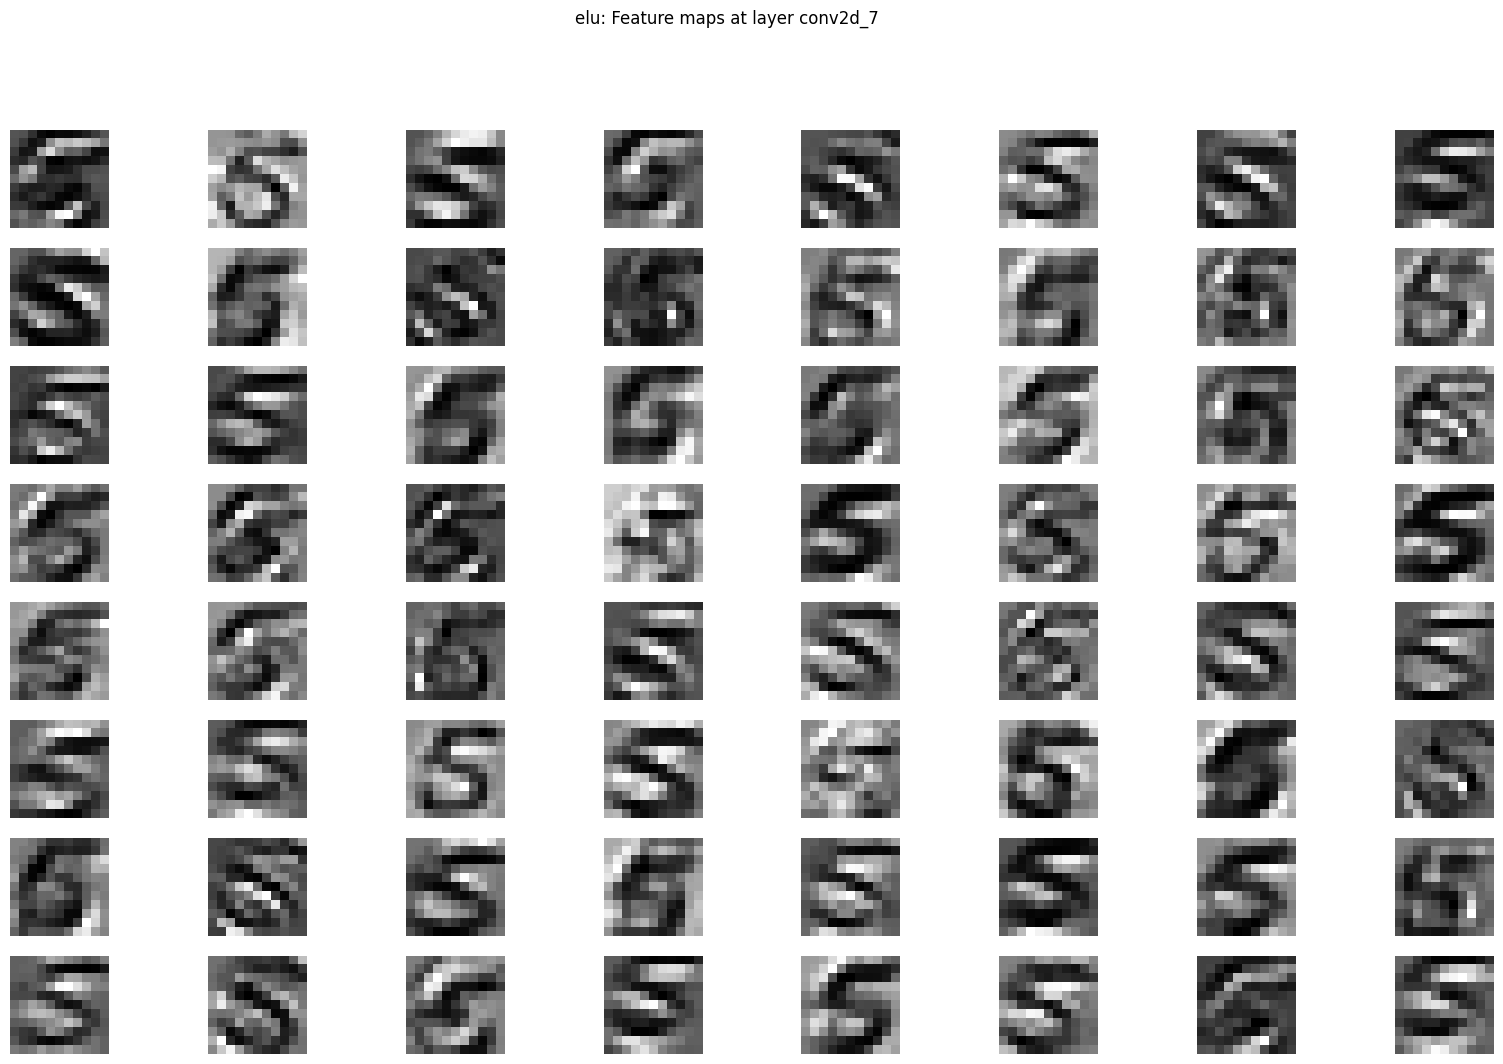

Epoch 1/5


2023-11-27 18:05:54.631574: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.8604 - loss: 0.4601 - val_accuracy: 0.9817 - val_loss: 0.0658
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9726 - loss: 0.0916 - val_accuracy: 0.9858 - val_loss: 0.0529
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9779 - loss: 0.0727 - val_accuracy: 0.9860 - val_loss: 0.0527
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9821 - loss: 0.0559 - val_accuracy: 0.9885 - val_loss: 0.0446
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9840 - loss: 0.0505 - val_accuracy: 0.9860 - val_loss: 0.0519
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


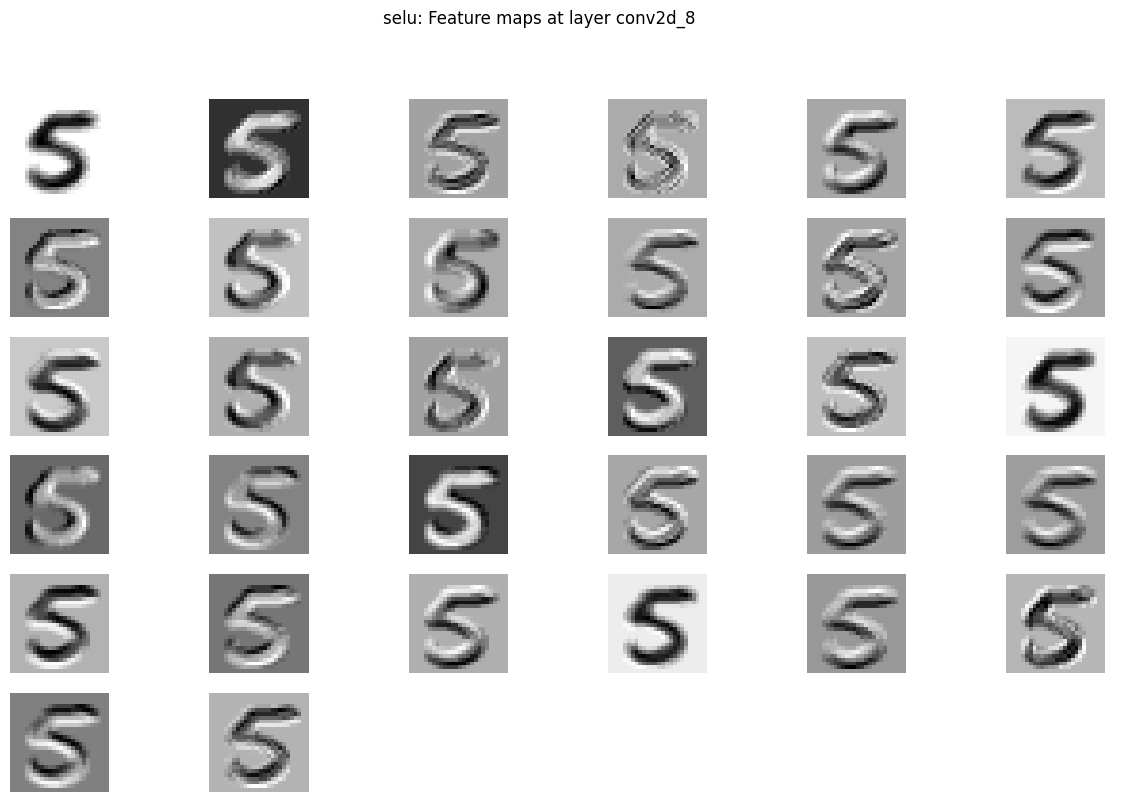

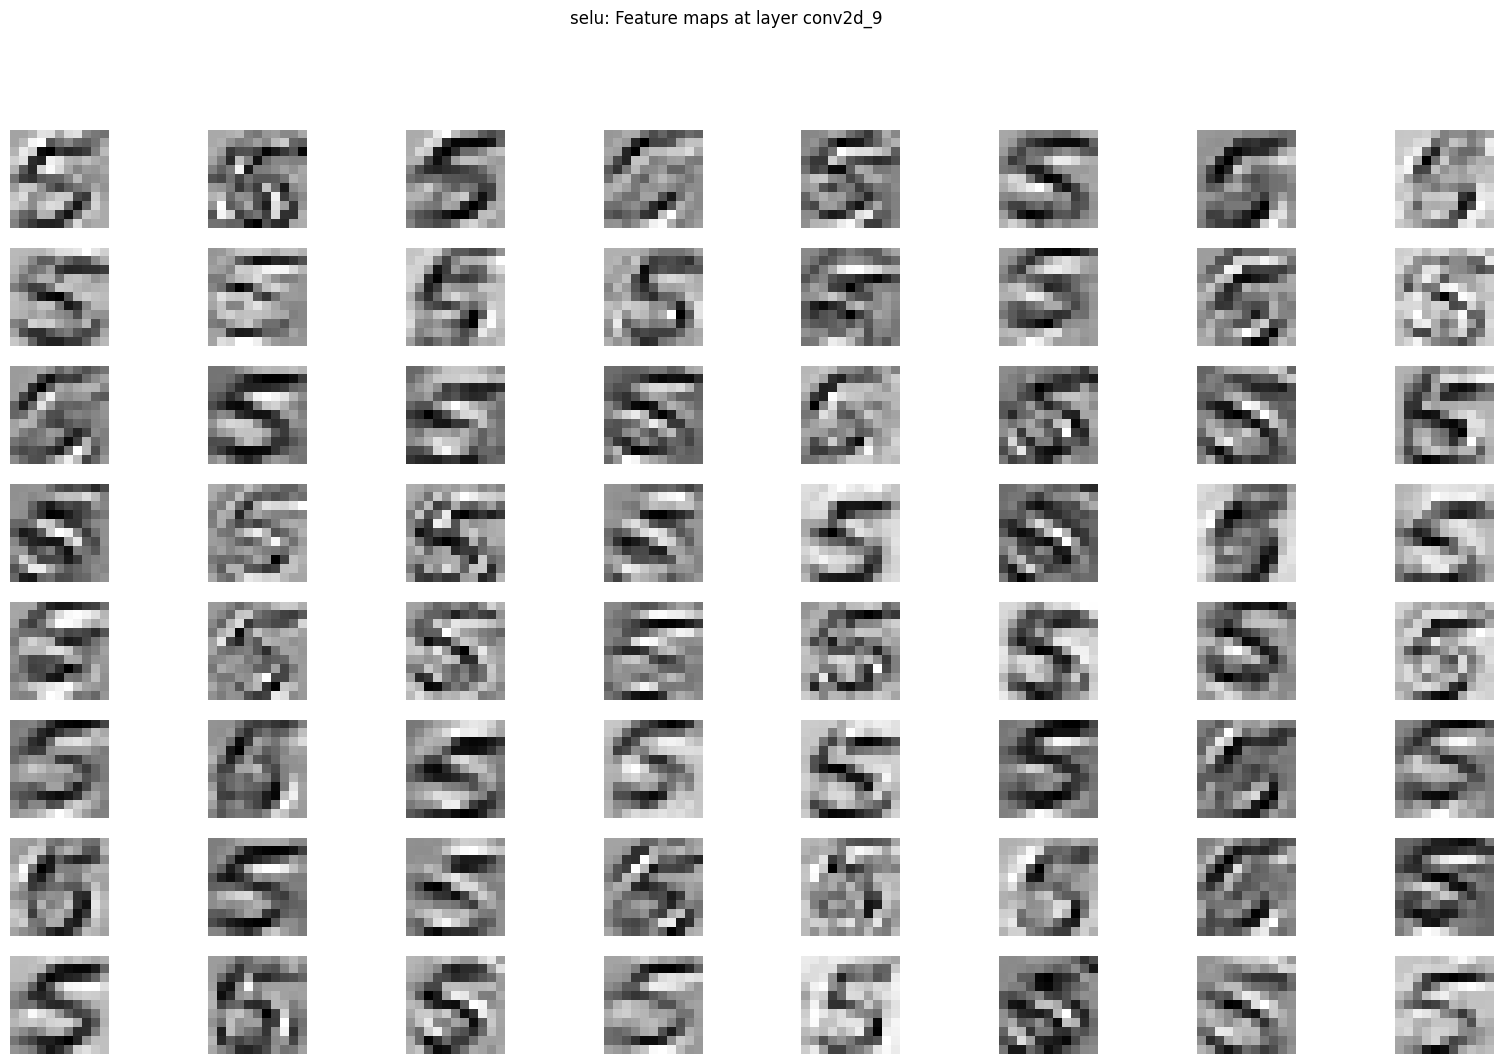

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.1118 - loss: 2.3018 - val_accuracy: 0.1705 - val_loss: 2.2847
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.3189 - loss: 2.0486 - val_accuracy: 0.6523 - val_loss: 1.4962
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.3963 - loss: 1.6195 - val_accuracy: 0.6785 - val_loss: 1.2377
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - accuracy: 0.3970 - loss: 1.5042 - val_accuracy: 0.6982 - val_loss: 1.0867
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.4423 - loss: 1.4309 - val_accuracy: 0.7033 - val_loss: 0.9914
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


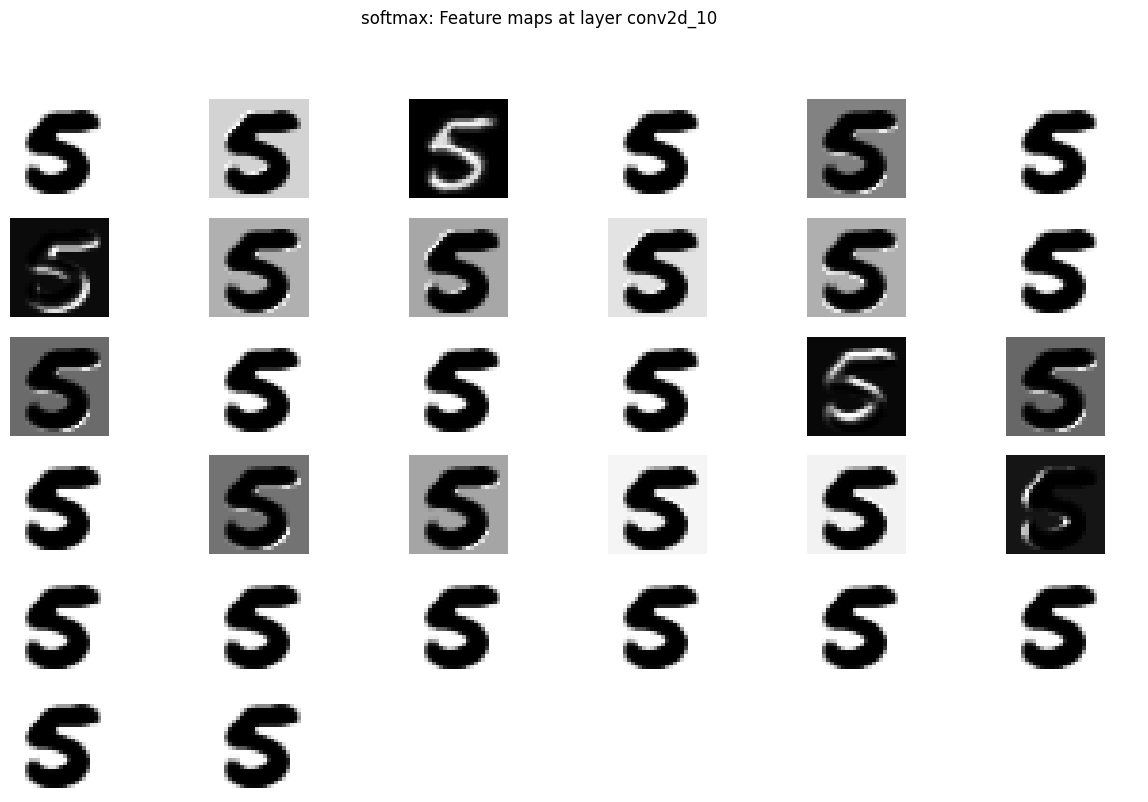

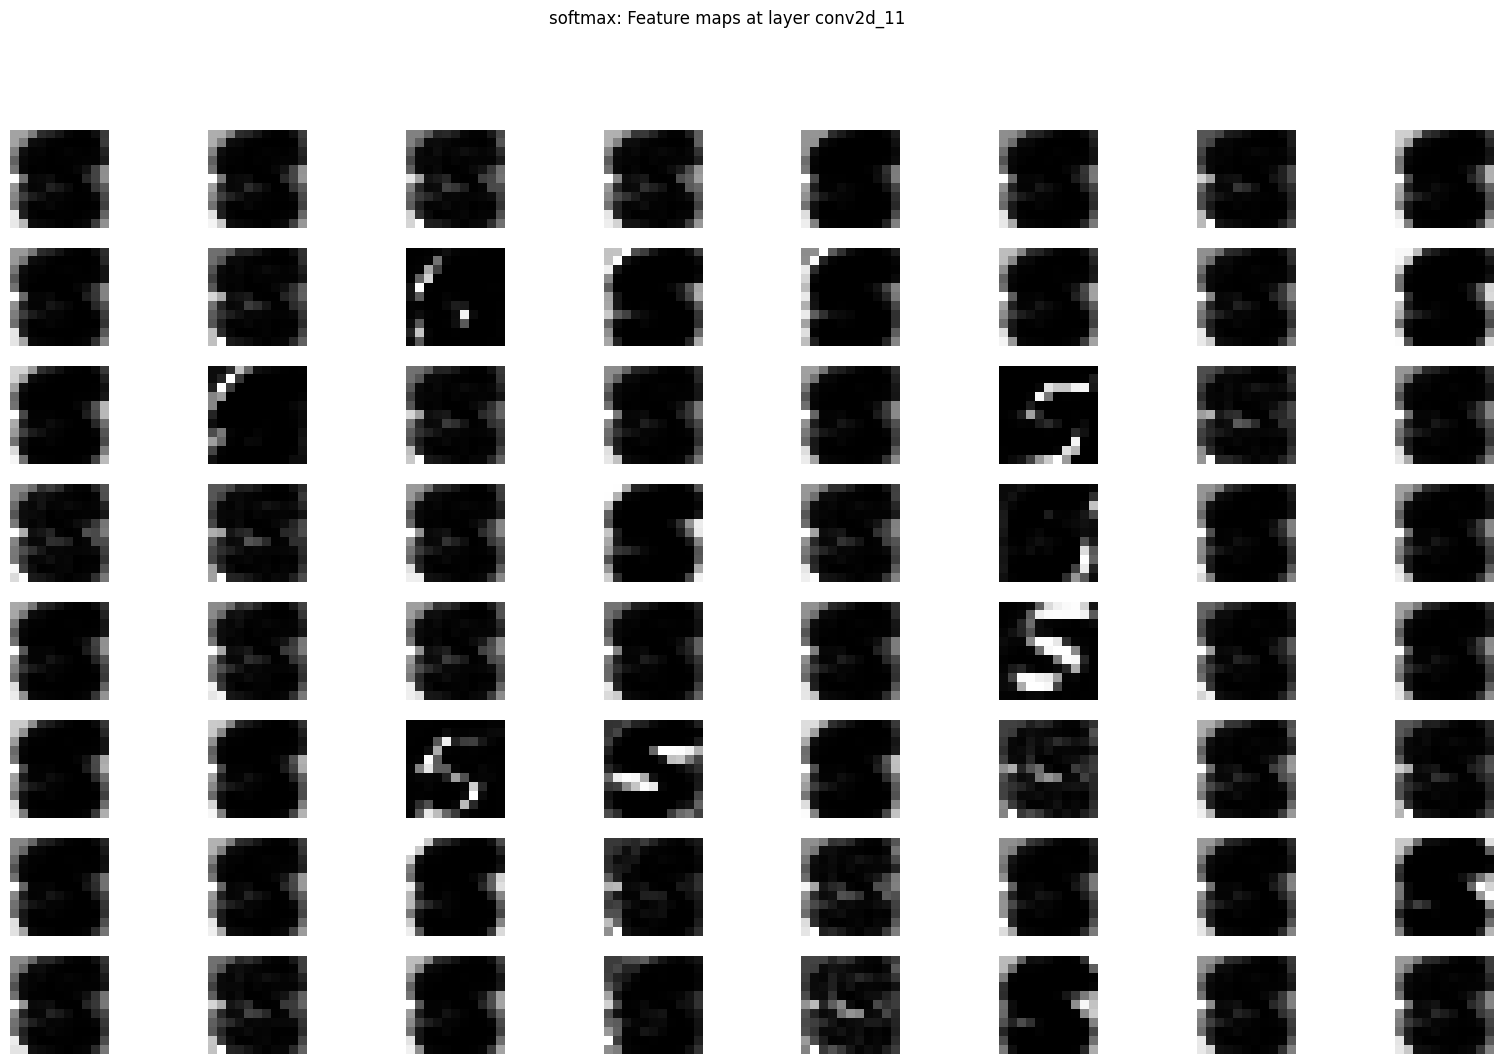

In [7]:
for activation in activation_functions:
    # Create model with the specified activation function
    model = create_model_with_activation(activation)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # Train the model 
    model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1)
    
    # Perform a forward pass to initialize the model
    _ = model.predict(x_test[:1])

    # Fetch the layer outputs
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    # Apply the model to the reshaped test image
    activations = activation_model.predict(test_image_reshaped)

    # Visualize feature maps for each Conv2D layer
    for layer_idx, layer_activation in enumerate(activations):
        # Determine the number of feature maps in the layer
        num_feature_maps = layer_activation.shape[-1]
        
        # Set the grid size
        grid_size = int(np.ceil(np.sqrt(num_feature_maps)))
        
        # Get the corresponding layer name from the original model
        layer_name = [layer.name for layer in model.layers if isinstance(layer, Conv2D)][layer_idx]
        
        # Visualize the feature maps
        display_activation(activation, layer_activation, grid_size, grid_size, layer_name)